Nama : Nadilla Nur 'Aini Yulian Putri

Kode Peserta : PYTN-KS15-012

Kelas : Introduction to Python for Data Science (Studi Independent)

## Import Library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


## Load Dataset

In [2]:
rideshare = pd.read_csv('dataset\\bank-additional-full.csv')

In [4]:
df = pd.read_csv('dataset\\bank-additional-full.csv', sep=';')
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
print(df.columns)
print(df.shape)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')
(41188, 21)


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
print(df.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


## Visualisasi

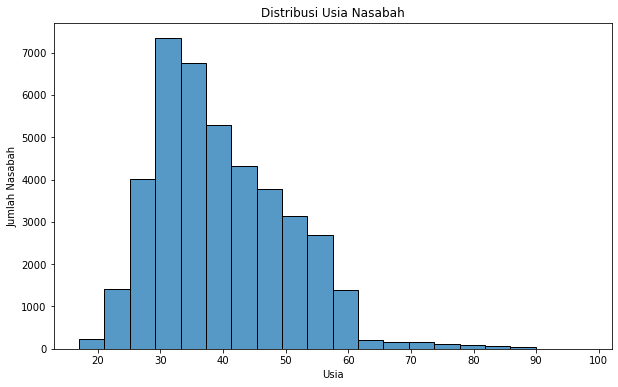

In [8]:
# Visualisasi distribusi usia
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', bins=20)
plt.title('Distribusi Usia Nasabah')
plt.xlabel('Usia')
plt.ylabel('Jumlah Nasabah')
plt.show()

### PENJELASAN
Dengan menggunakan histogram, kita dapat melihat frekuensi atau jumlah nasabah pada setiap rentang usia.

Misalnya jika histogram menunjukkan puncak yang tinggi pada rentang usia antara 30 hingga 40 tahun, maka hal itu berarti ada banyak nasabah dalam kelompok usia tersebut. Sebaliknya, jika terdapat sedikit nasabah pada rentang usia tertentu, maka histogram akan menampilkan puncak yang lebih rendah.

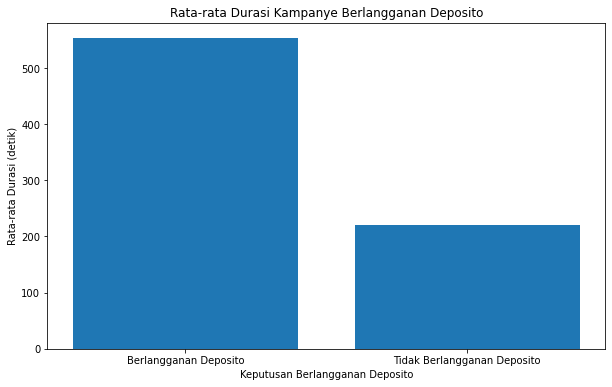

In [9]:
# Menghitung rata-rata durasi kampanye berlangganan deposito
duration_deposito = df[df['y'] == 'yes']['duration'].mean()

# Menghitung rata-rata durasi kampanye tanpa berlangganan deposito
duration_no_deposito = df[df['y'] == 'no']['duration'].mean()

# Membuat bar plot
plt.figure(figsize=(10, 6))
plt.bar(['Berlangganan Deposito', 'Tidak Berlangganan Deposito'], [duration_deposito, duration_no_deposito])
plt.title('Rata-rata Durasi Kampanye Berlangganan Deposito')
plt.xlabel('Keputusan Berlangganan Deposito')
plt.ylabel('Rata-rata Durasi (detik)')
plt.show()

### PENJELASAN
Kode tersebut akan menghitung rata-rata durasi kampanye untuk kedua kelompok dan kemudian menampilkan bar plot dengan sumbu x sebagai kategori keputusan berlangganan deposito dan sumbu y sebagai rata-rata durasi kampanye dalam detik.

## Label Encoder

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
# Kolom-kolom yang akan di-label encoding
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan',
                    'contact', 'month', 'day_of_week', 'poutcome','y']

# Inisialisasi objek LabelEncoder
label_encoder = LabelEncoder()

# Melakukan label encoding untuk setiap kolom kategorikal
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Menampilkan hasil label encoding
print(df.head(5))

   age  job  marital  education  default  housing  loan  contact  month  \
0   56    3        1          0        0        0     0        1      6   
1   57    7        1          3        1        0     0        1      6   
2   37    7        1          3        0        2     0        1      6   
3   40    0        1          1        0        0     0        1      6   
4   56    7        1          3        0        0     2        1      6   

   day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0            1  ...         1    999         0         1           1.1   
1            1  ...         1    999         0         1           1.1   
2            1  ...         1    999         0         1           1.1   
3            1  ...         1    999         0         1           1.1   
4            1  ...         1    999         0         1           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0          93.994          -36.4      4.85

## Logistic Regresion

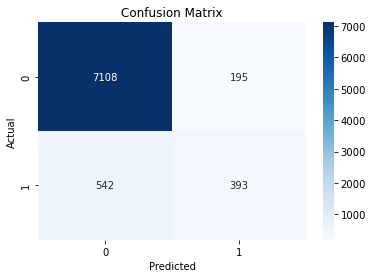


Akurasi: 0.910536537994659


In [12]:
# Memisahkan fitur dan target
X = df.drop('y', axis=1)
y = df['y']

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melakukan penskalaan fitur menggunakan StandarScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Membangun model regresi logistik
model = LogisticRegression()

# Melatih model dengan data latih yang telah diubah skala
model.fit(X_train_scaled, y_train)

# Memprediksi target pada data uji yang telah diubah skala
y_pred = model.predict(X_test_scaled)

# Menghasilkan Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)

# Membuat heatmap dari Confusion Matrix
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print('\nAkurasi:', accuracy)

## KNN

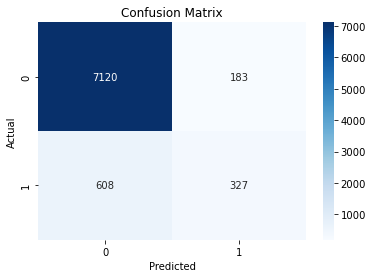


Akurasi: 0.9039815489196407


In [13]:
# Memisahkan fitur dan target
X = df.drop('y', axis=1)
y = df['y']

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melakukan penskalaan fitur menggunakan StandarScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Membangun model KNN dengan k=5
model = KNeighborsClassifier(n_neighbors=19)

# Melatih model dengan data latih yang telah diubah skala
model.fit(X_train_scaled, y_train)

# Memprediksi target pada data uji yang telah diubah skala
y_pred = model.predict(X_test_scaled)

# Menghasilkan Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)

# Membuat heatmap dari Confusion Matrix
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print('\nAkurasi:', accuracy)

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Membangun model KNN
model = KNeighborsClassifier()

# Menentukan hyperparameter yang akan diuji
param_grid = {'n_neighbors': [3, 5, 7, 11, 15, 21],
              'weights': ['uniform', 'distance']}

# Membuat objek GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5)

# Melatih model dengan data latih yang telah diubah skala
grid_search.fit(X_train_scaled, y_train)

# Mendapatkan parameter terbaik dari GridSearchCV
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Memprediksi target pada data uji yang telah diubah skala
y_pred = grid_search.predict(X_test_scaled)

# Menampilkan best score
print("Best Score:", grid_search.best_score_)

Best Parameters: {'n_neighbors': 21, 'weights': 'distance'}
Best Score: 0.9059180576631259


## SVM

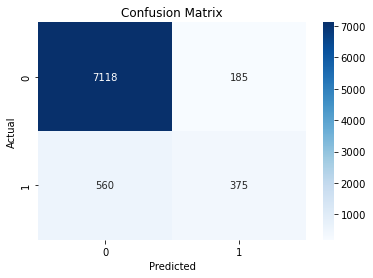


Accuracy: 0.9095654285020636


In [15]:
# Memisahkan fitur dan target
X = df.drop('y', axis=1)
y = df['y']

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melakukan penskalaan fitur menggunakan StandarScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Membangun model SVM
model = SVC()

# Melatih model dengan data latih yang telah diubah skala
model.fit(X_train_scaled, y_train)

# Memprediksi target pada data uji yang telah diubah skala
y_pred = model.predict(X_test_scaled)

# Menghitung dan menampilkan confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
# Membuat heatmap dari Confusion Matrix
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

## Decision Tree

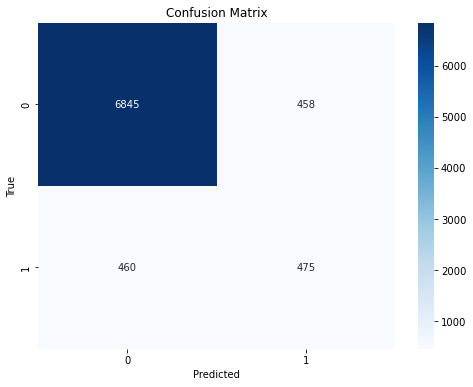


Accuracy: 0.8885651857246905


In [16]:
# Memisahkan fitur dan target
X = df.drop('y', axis=1)
y = df['y']

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membangun model Decision Tree
model = DecisionTreeClassifier()

# Melatih model dengan data latih
model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Membuat confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Membuat heatmap confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

## Random Forest

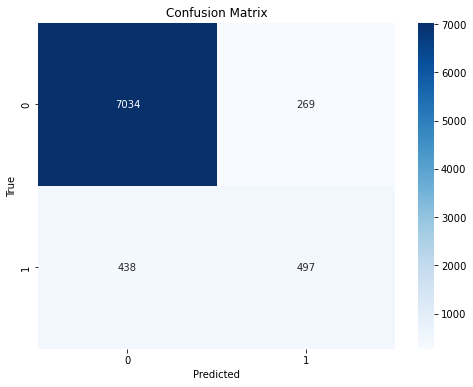


Accuracy: 0.9141781985918912


In [17]:
# Memisahkan fitur dan target
X = df.drop('y', axis=1)
y = df['y']

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membangun model Random Forest
model = RandomForestClassifier(n_estimators=500)

# Melatih model dengan data latih
model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Membuat confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Membuat heatmap confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

## Naive Bayes

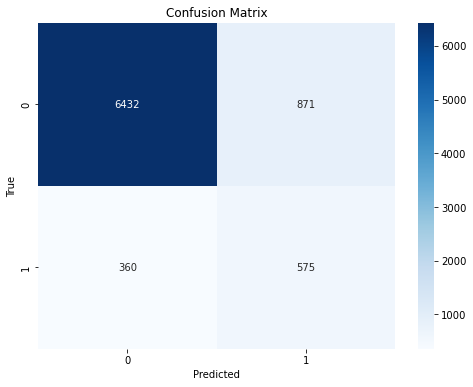


Accuracy: 0.8505705268268997


In [18]:
# Memisahkan fitur dan target
X = df.drop('y', axis=1)
y = df['y']

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membangun model Naive Bayes
model = GaussianNB()

# Melatih model dengan data latih
model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Membuat confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Membuat heatmap confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

## Simpulan

Dari hasil skor akurasi seluruh algoritma, maka didapatkan skor nilai sebagai berikut :

 1. Random Forest : 0.915
 2. Logistic Regression : 0.910
 3. SVM : 0.909
 4. KNN With GridSearchCV : 0.905 | KNN : 0.903
 5. Decision Tree : 0.887
 6. Naive Bayes : 0.850

Jika yang diutamakan adalah nilai akurasi, maka tentu random forest akan jauh lebih baik digunakan karena mendapat skor akurasi tertinggi dari model lain.

Namun, ada beberapa hal yang perlu diperhatikan juga secara umum yaitu:

Confusion Matrix: Periksa confusion matrix dari setiap model. Perhatikan metrik seperti true positive rate (TPR), false positive rate (FPR), true negative rate (TNR), dan false negative rate (FNR). Pilih model yang memiliki keseimbangan yang baik antara TPR dan FPR, serta TNR dan FNR.

Overfitting: Pastikan model tidak mengalami overfitting, yaitu ketika model terlalu terfokus pada data latih dan tidak dapat umum untuk data yang belum pernah dilihat sebelumnya. Perhatikan apakah terdapat perbedaan yang signifikan antara skor akurasi pada data latih dan data uji. Jika perbedaannya besar, itu bisa menjadi indikasi overfitting.

Kompleksitas Model: Perhatikan kompleksitas model yang digunakan. Model yang lebih sederhana cenderung lebih mudah diinterpretasikan dan diimplementasikan. Jika dua model memiliki performa serupa, lebih baik memilih model yang lebih sederhana.